Import libraries:

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import gzip
import datetime 
from os.path import *
from os import listdir
import pandas
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


# View Landsat 8 RGB and SWIR bands for one Image

In [4]:
def normalize_red(array):
    return (array - array.min()) / (array.max() - array.min())
def normalize_green(array):
    return (array - array.min()) / (array.max() - array.min())
def normalize_blue(array):
    return (array - array.min()) / (array.max() - array.min())

Running...


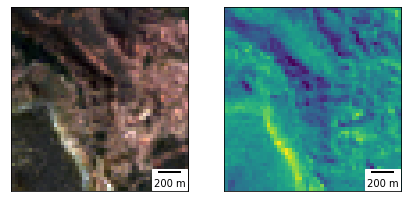

In [5]:
print ("Running...") 
import matplotlib.gridspec as gridspec

fig, axarr = plt.subplots(1,2, figsize=(7,7))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

#gs1 = gridspec.GridSpec(4, 4)
#gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

#fig.subplots_adjust(wspace=0, hspace=0)
# Get the list of all quads in the directory they have been downloaded from:
TEMP_DIR = '/Volumes/GoogleDrive/My Drive/TemporalCerrado2018/1_0-3_2018-01-01.tif'

# GOOD: 1_0-0_2018-01-01.tif, 
# Really good: 1_0-3_2018-01-01.tif, 1_0-5_2018-01-01.tif
# RGB IMAGE:
raster = rasterio.open(TEMP_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr[0].add_artist(scalebar)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_ylabel("")
#axarr[row][i].set_aspect('equal')
axarr[0].imshow(rgb)


# SWIR IMAGE:
raster = rasterio.open(TEMP_DIR )
swir = raster.read(5)

scalebar = ScaleBar(30, location='lower right')
axarr[1].add_artist(scalebar)
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[1].set_ylabel("")
#axarr[row][i].set_aspect('equal')
axarr[1].imshow(swir)

plt.show()


## View Metadata of Image

In [13]:
TEMP_DIR = r'/Volumes/GoogleDrive/My Drive/TemporalCerrado2018/1_0-3_2018-01-01.tif'

import exifread
# Open image file for reading (binary mode)
f = open(TEMP_DIR, 'rb')

# Return Exif tags
tags = exifread.process_file(f)

# Print the tag/ value pairs
for tag in tags.keys():
    if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
        print ("Key: %s, value %s" % (tag, tags[tag]))

Key: Image ImageWidth, value 50
Key: Image ImageLength, value 52
Key: Image BitsPerSample, value [16, 16, 16, 16, 16, 16, 16]
Key: Image Compression, value LZW
Key: Image PhotometricInterpretation, value 1
Key: Image SamplesPerPixel, value 7
Key: Image PlanarConfiguration, value 1
Key: Image Predictor, value None
Key: Image TileWidth, value 256
Key: Image TileLength, value 256
Key: Image TileOffsets, value 950
Key: Image TileByteCounts, value 42364
Key: Image ExtraSamples, value UnspecifiedUnspecifiedUnspecifiedUnspecifiedUnspecifiedUnspecified
Key: Image SampleFormat, value SignedSignedSignedSignedSignedSignedSigned
Key: Image Tag 0x830E, value [(30.0,), (30.0,), (0.0,)]
Key: Image Tag 0x8482, value [(0.0,), (0.0,), (0.0,), (533475.0,), (-1594755.0,), (0.0,)]
Key: Image Tag 0x87AF, value [1, 1, 0, 7, 1024, 0, 1, 1, 1025, 0, 1, 1, 1026, 34737, 22, 0, 2049, 34737, 7, 22, 2054, 0, 1, 9102, 3072, 0, 1, 32623, 3076, 0, 1, 9001]
Key: Image Tag 0x87B1, value WGS 84 / UTM zone 23N|WGS 84|
Key

# View Date Distribution

## Month displacement

In [54]:
# Get all but .DS_STORE
Dates_DIR = '/Users/calum/Documents/Biome Dates'
dirs = os.listdir(Dates_DIR)
dirs.remove('.DS_Store')

amazon_dates = []
cerrado_dates = []
caatinga_dates = []

for cur_dir in dirs:
    quad_DIR = os.path.join(Dates_DIR, cur_dir)
    spreadsheets = os.listdir(quad_DIR)
    for sheet in spreadsheets:
        if sheet != '.DS_Store':
            sheet_DIR = os.path.join(quad_DIR, sheet)
            dict = pandas.read_csv(sheet_DIR)
            dates = dict.Date.str.split('T')
            for date in dates:
                if 'Caatinga' in quad_DIR:
                    caatinga_dates.append(date[0].replace('-', ''))
                if 'Amazon' in quad_DIR:
                    amazon_dates.append(date[0].replace('-', ''))
                if 'Cerrado' in quad_DIR:
                    cerrado_dates.append(date[0].replace('-', ''))
                

In [58]:
print (np.sum(cat_months))
print (np.sum(ama_months))
print (np.sum(cer_months))

570493
318491
444168


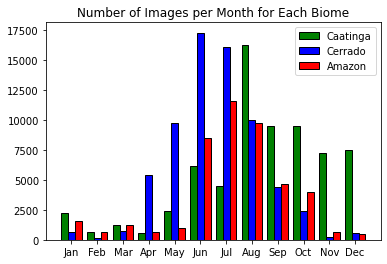

In [55]:
dtm = lambda x: int(x[4:6])
cat_months = list(map(dtm, caatinga_dates))
ama_months = list(map(dtm, amazon_dates))
cer_months = list(map(dtm, cerrado_dates))

fig, ax = plt.subplots()
bins = np.arange(1,14)
ax.hist([cat_months, cer_months, ama_months], bins = bins, edgecolor="k", align='left', color=['green', 'blue', 'red'])
ax.set_xticks(bins[:-1])
ax.set_xticklabels([datetime.date(1900,i,1).strftime('%b') for i in bins[:-1]] )
plt.legend(['Caatinga', 'Cerrado', 'Amazon'])
plt.title('Number of Images per Month for Each Biome')
plt.show()

In [47]:
print (len(caatinga_dates))
print (len(amazon_dates))
print (len(cerrado_dates))

10200
4148
13600


## Quad Displacement

### For Temporal Data

In [41]:
# Get all but .DS_STORE
train_DIR = '/Volumes/GoogleDrive/My Drive/TemporalData-Train'
test_DIR = '/Volumes/GoogleDrive/My Drive/TemporalData-Eval'
train_dirs = os.listdir(train_DIR)
test_dirs = os.listdir(test_DIR)

quad_1 = np.array([0, 0, 0])
quad_2 = np.array([0, 0, 0])
quad_3 = np.array([0, 0, 0])
quad_4 = np.array([0, 0, 0])
quads = [quad_1, quad_2, quad_3, quad_4]

for set_DIR in [train_DIR, test_DIR]:
    biomes = os.listdir(set_DIR)
    for cur_dir in biomes:
        biome_DIR = os.path.join(set_DIR, cur_dir)
        cur_biome = os.listdir(biome_DIR)
        cur_quad = 0
        for quad in cur_biome:
            quad_DIR = os.path.join(biome_DIR, quad)
            quad_images = os.listdir(quad_DIR)
            for img in quad_images:
                img_DIR = os.path.join(quad_DIR, img)
                num_images = len(os.listdir(img_DIR))
                if "Amazonia" in quad_DIR:
                    quads[cur_quad][0] += num_images
                elif "Cerrado" in quad_DIR:
                    quads[cur_quad][1] += num_images
                elif "Caatinga" in quad_DIR:
                    quads[cur_quad][2] += num_images
                else:
                    print (quad_DIR)
            
            cur_quad += 1
                

In [42]:
print (np.array(quads))
print (np.sum(quads))

[[2515 2998 3006]
 [2403 3190 2738]
 [3084 3183 2489]
 [3482 2942 2954]]
34984


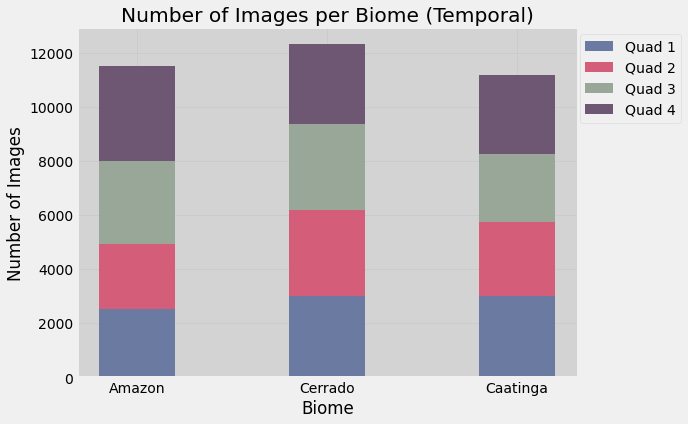

In [43]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
labels = ['Amazon', 'Cerrado', 'Caatinga']
ax.bar(labels, quads[0], label='Quad 1', width=0.4, color = '#6B7AA1')
ax.bar(labels, quads[1], bottom = quads[0], width=0.4, label='Quad 2', color='#D45D79')
ax.bar(labels, quads[2], bottom = quads[0]+quads[1],width=0.4, label='Quad 3', color='#99A799')
ax.bar(labels, quads[3], bottom = quads[0]+quads[1]+quads[2], width=0.4,label='Quad 4', color='#6E5773')
ax.set_facecolor(color='lightgrey')
plt.title('Number of Images per Biome (Temporal)')
plt.ylabel('Number of Images')
plt.xlabel('Biome')
ax.legend(bbox_to_anchor=(1.22,1))
plt.show()

### For Spatial Data

In [44]:

# Get all but .DS_STORE
head_DIR = '/Volumes/GoogleDrive/My Drive/'

biomes = ['Amazonia', 'Cerrado', 'Caatinga']


quad_1 = np.array([0, 0, 0])
quad_2 = np.array([0, 0, 0])
quad_3 = np.array([0, 0, 0])
quad_4 = np.array([0, 0, 0])
quads = [quad_1, quad_2, quad_3, quad_4]

cur_img = 0
        
for biome in biomes:
        desired_quads = [1,2,3,4]

        biome_idx = 0

        cur_quad = 0
        
        for quad in desired_quads:

            quad_idx = 0

            biome_DIR = head_DIR + biome + ' 2019 Quad ' + str(quad) + '/'

            images = [f.path for f in os.scandir(biome_DIR) if f.is_file() and '.tif' in f.path]
            if "Amazonia" in biome_DIR:
                quads[cur_quad][0] += len(images)
            elif "Cerrado" in biome_DIR:
                quads[cur_quad][1] += len(images)
            elif "Caatinga" in biome_DIR:
                quads[cur_quad][2] += len(images)
            else:
                print (biome_DIR)
            
            cur_quad += 1
                

In [45]:
quads

[array([2400, 3350, 3347]),
 array([2421, 3350, 2866]),
 array([2660, 2823, 2609]),
 array([3311, 3314, 2889])]

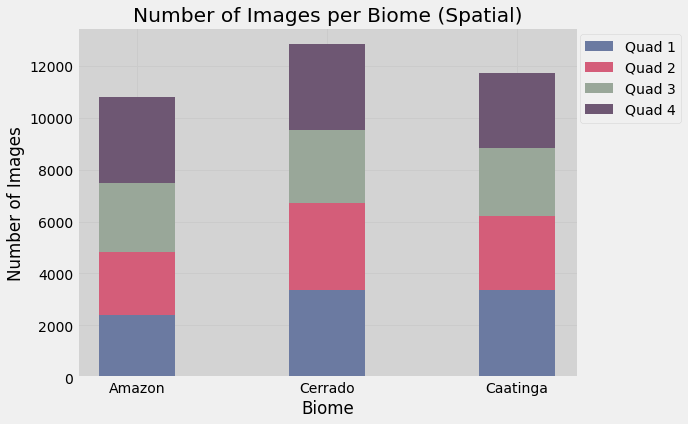

In [46]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,6))
labels = ['Amazon', 'Cerrado', 'Caatinga']
ax.bar(labels, quads[0], label='Quad 1', width=0.4, color = '#6B7AA1')
ax.bar(labels, quads[1], bottom = quads[0], width=0.4, label='Quad 2', color='#D45D79')
ax.bar(labels, quads[2], bottom = quads[0]+quads[1],width=0.4, label='Quad 3', color='#99A799')
ax.bar(labels, quads[3], bottom = quads[0]+quads[1]+quads[2], width=0.4,label='Quad 4', color='#6E5773')
ax.set_facecolor(color='lightgrey')
plt.title('Number of Images per Biome (Spatial)')
plt.ylabel('Number of Images')
plt.xlabel('Biome')
ax.legend(bbox_to_anchor=(1.22,1))
plt.show()

## View Before and After shot of image that changes class

Running...
(52, 51, 3)


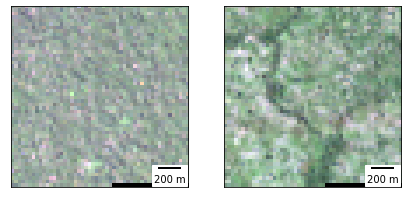

In [13]:
print ("Running...") 
import matplotlib.gridspec as gridspec

fig, axarr = plt.subplots(1,2, figsize=(7,7))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

# Get the list of all quads in the directory they have been downloaded from:
before_DIR = '/Volumes/GoogleDrive/My Drive/AreaOfDeforestation-2016/3.tif'
after_DIR = '/Volumes/GoogleDrive/My Drive/AreaOfDeforestation-2021/3.tif'

# RGB IMAGE:
raster = rasterio.open(before_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr[0].add_artist(scalebar)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_ylabel("")
#axarr[row][i].set_aspect('equal')
axarr[0].imshow(rgb)


# SWIR IMAGE:
raster = rasterio.open(after_DIR )
red = raster.read(4)
green = raster.read(3)
blue = raster.read(2)

red_norm = normalize_red(red)
green_norm = normalize_green(green)
blue_norm = normalize_blue(blue)

# Stack bands
rgb = np.dstack((red_norm, green_norm, blue_norm))

scalebar = ScaleBar(30, location='lower right')
axarr[1].add_artist(scalebar)
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[1].set_ylabel("")
#axarr[row][i].set_aspect('equal')
axarr[1].imshow(rgb)

plt.show()


## Add ScaleBar to a loaded image

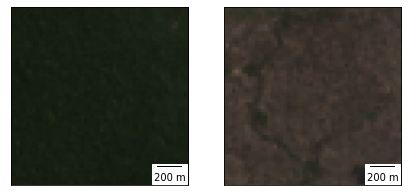

In [25]:
fig, axarr = plt.subplots(1,2, figsize=(7,7))#, gridspec_kw = {'wspace':0.5, 'hspace':0})

image_before = plt.imread('/Users/calummcmeekin/Documents/GitHub/MInf-Project/Part 2/Report/DeforestationBefore.png')

axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_ylabel("")

scalebar = ScaleBar(2, location='lower right') # 1 pixel = 0.2 meter
axarr[0].add_artist(scalebar)

axarr[0].imshow(image_before)

image_after = plt.imread('/Users/calummcmeekin/Documents/GitHub/MInf-Project/Part 2/Report/DeforestationAfter.png')

axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[1].set_ylabel("")

scalebar = ScaleBar(2, location='lower right') # 1 pixel = 0.2 meter
axarr[1].add_artist(scalebar)

axarr[1].imshow(image_after)


plt.show()